In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from penkit.preview import show_layer
import numpy as np

In [3]:
def make_joy_texture(num_lines=10, resolution=50):
    x, y = np.meshgrid(
        np.hstack([np.linspace(0, 1, resolution), np.nan]),
        np.linspace(0, 1, num_lines),
    )
    y[np.isnan(x)] = np.nan
    return x.flatten(), y.flatten()

In [4]:
joy_texture = make_joy_texture(6)

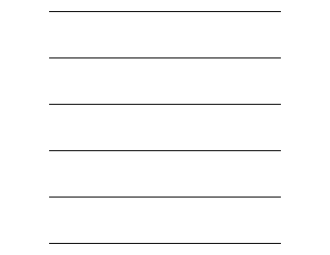

In [5]:
show_layer(joy_texture)

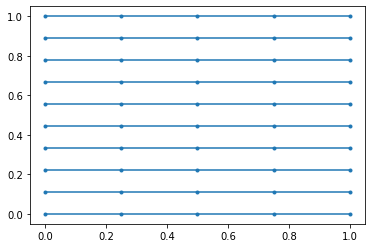

In [6]:
plt.plot(*make_joy_texture(10, 5), marker='.');

In [7]:
from scipy.ndimage.filters import gaussian_filter
np.random.seed(int('banana', 36))
NOISE_BLUR = 40
noise_surface = gaussian_filter(np.random.normal(size=(500, 500)), NOISE_BLUR)


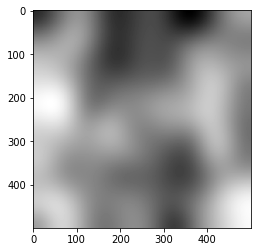

In [8]:
plt.imshow(noise_surface, cmap='gray')

In [9]:
SURFACE_SIZE = 500
grid = np.meshgrid(
    np.linspace(0, 1, SURFACE_SIZE),
    np.linspace(0, 1, SURFACE_SIZE)
)

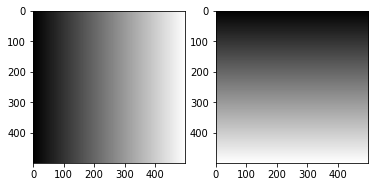

In [10]:
_, (p1, p2) = plt.subplots(1, 2)
p1.imshow(grid[0], cmap='gray')
p2.imshow(grid[1], cmap='gray')

In [11]:
hole_surface = np.sin(
    np.linalg.norm((np.array(grid) - .5) * np.pi, axis=0)
)

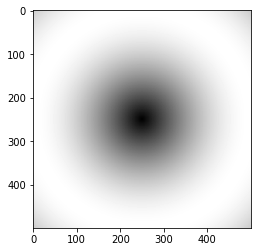

In [12]:
plt.imshow(hole_surface, cmap='gray');

In [13]:
NUM_BUBBLES_PER_SIDE = 3
bubble_surface = (
    np.sin((grid[0] - .5) * NUM_BUBBLES_PER_SIDE * np.pi) *
    np.sin((grid[1] - .5) * NUM_BUBBLES_PER_SIDE * np.pi)
)

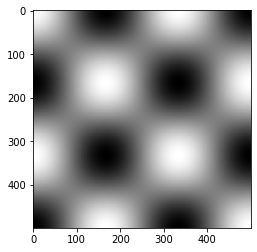

In [14]:
plt.imshow(bubble_surface, cmap='gray')

In [15]:
def texture_map(texture, surface):
    texture_x, texture_y = texture
    surface_w, surface_h = surface.shape
    
    index_x = np.clip(np.int32(surface_w * texture_x), 0, surface_w - 1)
    index_y = np.clip(np.int32(surface_h * texture_y), 0, surface_h - 1)
    surface_z = surface[index_x, index_y]
    with np.errstate(invalid='ignore'):
        surface_z[(texture_x < 0) | (texture_x >= 1) |
                    (texture_y < 0) | (texture_y >= 1)] = np.nan
    return surface_z

In [16]:
def texture_plot(texture, surface, angle=45, **kwargs):
    surface_x, surface_y = texture
    surface_Z = texture_map(texture, surface.T)
    z_coef = np.sin(np.radians(angle))
    y_coef = np.cos(np.radians(angle))
    plot = (surface_x, -surface_y * y_coef + surface_Z * z_coef)
    return show_layer(plot, **kwargs)

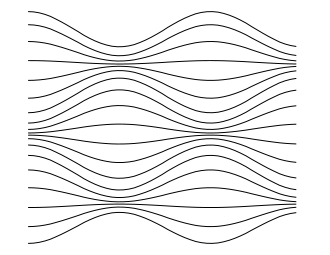

In [17]:
texture_plot(make_joy_texture(20), bubble_surface * 0.1, 40)

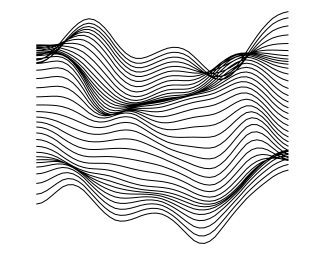

In [18]:
texture_plot(make_joy_texture(40), noise_surface * 12, 40)

In [19]:
def make_visible_mask(surface, angle):
    s = surface.shape[0]
    y_coef = np.cos(np.radians(angle))
    z_coef = np.sin(np.radians(angle))
    
    projected_surface = (
        z_coef * surface -
        y_coef * np.expand_dims(np.linspace(0., 1., s), axis=1)
    )
    projected_surface_max = np.flipud(np.maximum.accumulate(np.flipud(projected_surface)))
    return projected_surface == projected_surface_max

In [20]:
def remove_hidden_parts(surface, angle):
    surface = np.copy(surface)
    surface[~make_visible_mask(surface, angle)] = np.nan
    return surface

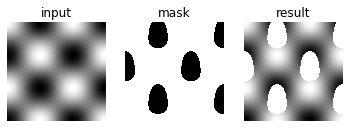

In [21]:
_, (i, m, r) = plt.subplots(1 ,3)
i.imshow(bubble_surface, cmap='gray')
i.set_title('input')
i.axis('off')
m.imshow(make_visible_mask(bubble_surface, 10), cmap='gray')
m.set_title('mask')
m.axis('off')
r.imshow(remove_hidden_parts(bubble_surface, 10), cmap='gray')
r.set_title('result')
r.axis('off');

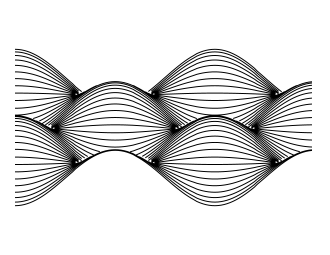

In [22]:
angle=70
texture_plot(make_joy_texture(50, 100), remove_hidden_parts(bubble_surface * 0.1, angle), angle)

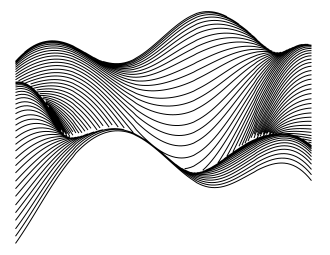

In [23]:
angle=65
texture_plot(make_joy_texture(80, 100), remove_hidden_parts(
    hole_surface * 1.2 + noise_surface + bubble_surface * 0.1, angle), angle)

In [24]:
def make_grid_texture(num_h_lines=10, num_v_lines=10, resolution=50):
    x_h, y_h = make_joy_texture(num_h_lines, resolution)
    y_v, x_v = make_joy_texture(num_v_lines, resolution)
    return np.concatenate([x_h, x_v]), np.concatenate([y_h, y_v])

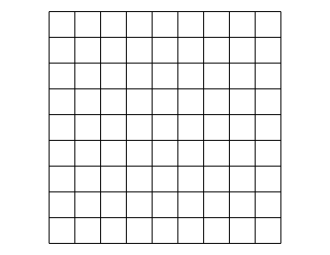

In [25]:
show_layer(make_grid_texture())

In [26]:
from penkit.textures.util import rotate_texture, fit_texture
grid_texture = fit_texture(rotate_texture(make_grid_texture(40, 40, 200), 40))

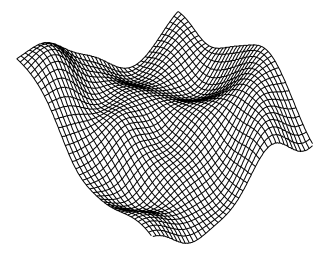

In [27]:
angle = 30
texture_plot(grid_texture, remove_hidden_parts(
    0.1 * hole_surface + 16 * noise_surface + 0.1 * bubble_surface, angle), angle)

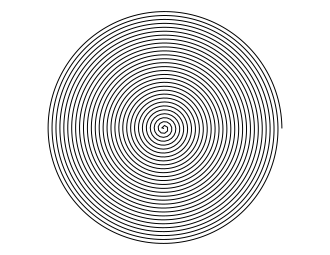

In [28]:
from penkit.textures import make_hex_texture, make_spiral_texture
spiral_texture = make_spiral_texture(
    spirals=30,
    ccw=False,
    resolution=3000
)
show_layer(spiral_texture)

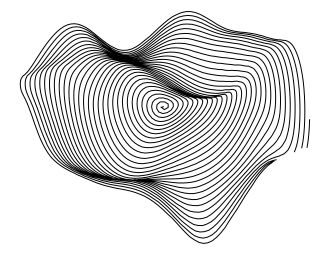

In [29]:
angle = 45
texture_plot(spiral_texture, remove_hidden_parts(
    0.1 * bubble_surface + 6 * noise_surface, angle), angle)

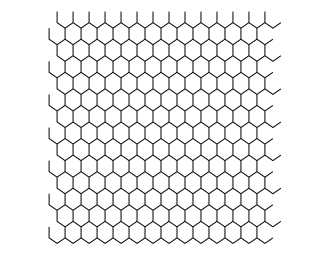

In [30]:
from penkit.textures import make_hex_texture
show_layer(make_hex_texture(14, 10))

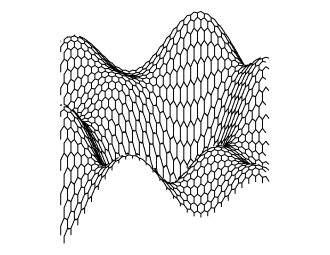

In [31]:
angle = 45
texture_plot(make_hex_texture(30, 10), remove_hidden_parts(
    hole_surface + 0.2 * bubble_surface, angle), angle)

In [32]:
sf_surface = np.load('sf.npy')
plot.imshow(sf_surface, cmap='gray')

FileNotFoundError: [Errno 2] No such file or directory: 'sf.npy'

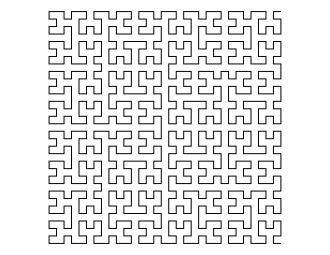

In [33]:
from penkit.fractal import hilbert_curve
show_layer(hilbert_curve(5))

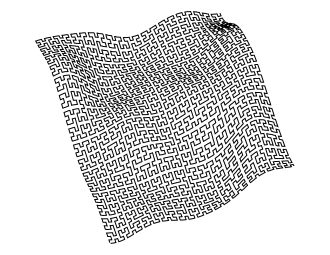

In [39]:
hilbert_texture = fit_texture(rotate_texture(hilbert_curve(6, 5), 22))
angle = 3
texture_plot(hilbert_texture, remove_hidden_parts(noise_surface * 81, angle), angle)